In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#project planning 
#understand the nature of the data .info() .describe ()
#Histograms and boxplots
#value counts
#missing Data / remove or impute?
#correlation between the metrics
#explore interesting themes 
#feature engineerin 
#preprocess data togeather or use a transformer? 
#use label for train and test 
#scaling?
#model basline 
# model comparison with CV

### Data Exploration

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_num = train[['Age', 'SibSp','Parch','Fare']]
df_cat = train[['Survived', 'Pclass','Sex', 'Ticket', 'Cabin', 'Embarked']]
#Survived and Pclass are labled as integers but we will be converting them into categorical

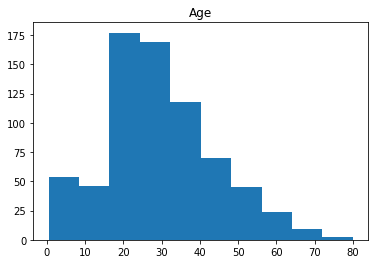

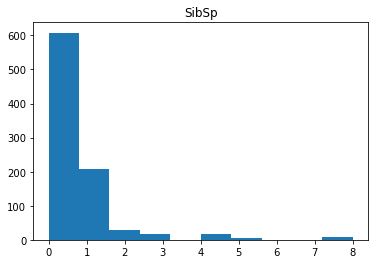

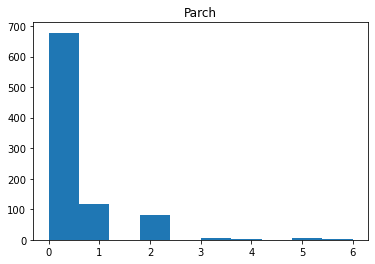

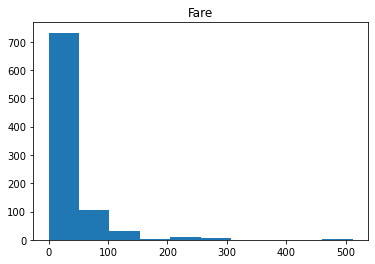

In [9]:
#distrubution for all numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

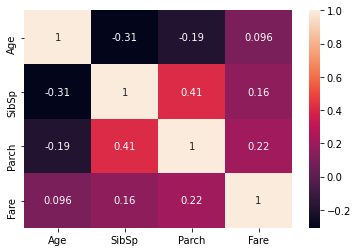

In [12]:
sns.heatmap(df_num.corr(), annot=True)

In [13]:
#commpare survival rate across Age Sibsp Parch an Fare aka df_num
pd.pivot_table(train, index = 'Survived', values = df_num)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


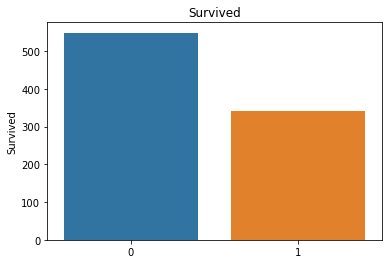

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


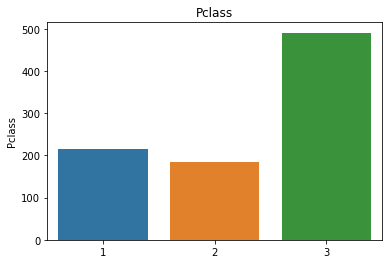

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


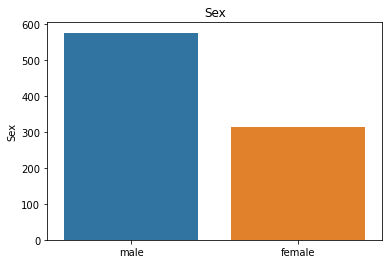

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


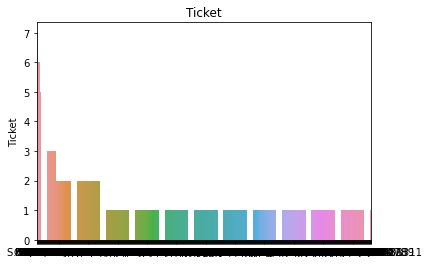

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


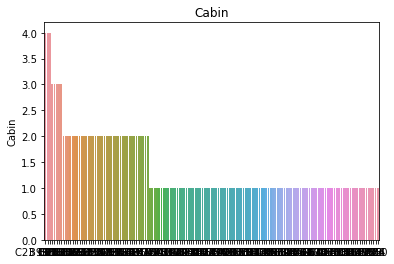

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


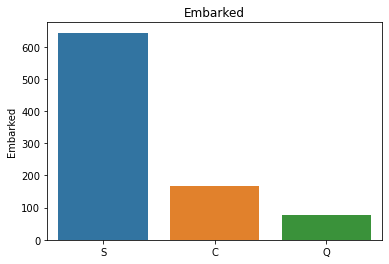

In [17]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [28]:
#comparing surviva and each of these categorical variales
print(pd.pivot_table(train, index = 'Survived', columns='Pclass', values = 'Ticket', aggfunc = 'count'))

print(pd.pivot_table(train, index = 'Survived', columns='Sex', values = 'Ticket', aggfunc = 'count'))

print(pd.pivot_table(train, index = 'Survived', columns='Embarked', values = 'Ticket', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Feature Enginering 

In [43]:
#Seperating cabins into inddividual Cabins
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train.cabin_multiple.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [46]:
#Now we can see survival rate across the cabins 
pd.pivot_table(train, index = 'Survived', columns='cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [48]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [52]:
print(train.cabin_adv.value_counts())
pd.pivot_table(train, index = 'Survived', columns='cabin_adv', values = 'Name', aggfunc = 'count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [58]:
#feature engineering on person's title
train.Name.head(50)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#when you strip you put the index to indicate where to strip from. so a 1 is everything behind that 
#and a zero is everytthing in front of it

In [60]:
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Ms                1
Sir               1
Mme               1
the Countess      1
Lady              1
Capt              1
Jonkheer          1
Name: name_title, dtype: int64

### Data Preprocessing 

Drop null values 

Include only relevant variables(since we have limited data I want to exclude things like name and passsenger ID so that we could have a reasonable number of features

do categorical transforms on all data . Usually we would use a transformer, but with this approach w can ensure that our training and test data have the same columns. We also may be able to infer somthing about the shape of the test data through this method. 

impute data with mean for fare and age 

normalized fare logarithm to give more semblancee of a normal distrubutio

scaled data 0-1 with standard scaler